In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rotation_image(image, angle):
    h, l = image.shape
    centre_y, centre_x = h//2, l//2

    theta = np.radians(angle)
    R = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)],
    ])

    sortie = np.zeros(image.shape)

    for y in range(h):
        for x in range(l):
            v = np.array([x - centre_x, y - centre_y])
            v_nouveau = R @ v
            new_x = int(v_nouveau[0] + centre_x)
            new_y = int(v_nouveau[1] + centre_y)

            if 0 <= new_x < l and 0 <= new_y < h:
                sortie[new_y, new_x] = image[x, y]
    return sortie

In [3]:
taille = 200
img = np.zeros((taille, taille))
img[70:130, 70:130] = 255

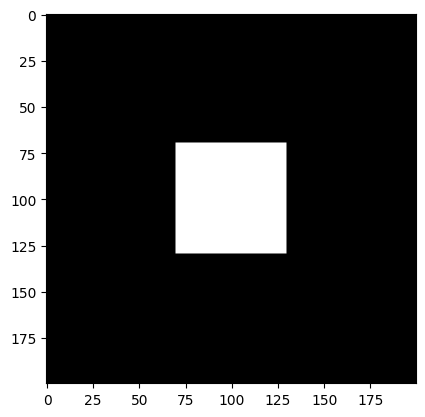

In [6]:
plt.imshow(img, cmap='gray')

In [11]:
img_45 = rotation_image(img, 45)

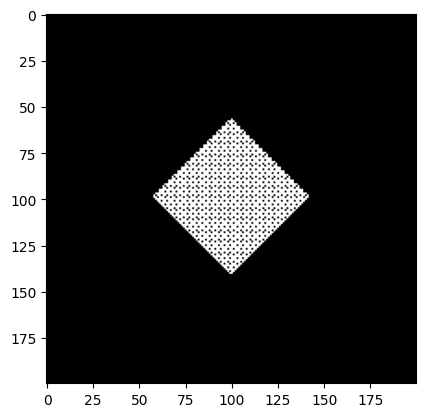

In [12]:
plt.imshow(img_45, cmap='gray')

In [13]:
def max_pool(matrice, fenetre, pas):
    hauteur, largeur = matrice.shape
    
    n_h = ((hauteur - fenetre) // pas) + 1
    n_l = ((largeur - fenetre) // pas) + 1

    sortie = np.zeros((n_h, n_l))

    for i in range(n_h):
        for j in range(n_l):
            zone = matrice[i*pas : i*pas + fenetre,
                           j*pas : j*pas + fenetre]

            sortie[i,j] = np.max(zone)
    
    return sortie

In [15]:
test = np.array([[1,2,3,4],
                [5,6,7,8],
                [9,10,11,12],
                [13,14,15,16]])

In [16]:
test

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

In [17]:
max_pool(test, 2, 2)

array([[ 6.,  8.],
       [14., 16.]])

In [18]:
from PIL import Image

In [23]:
img_brute = Image.open('/Users/nostradamus/Documents/Chartes/Cours_ENC/Cours_Chartes/grismoyen-camel_1.jpeg').convert('L')

In [24]:
image_array = np.array(img_brute)

In [35]:
image_poule = max_pool(image_array, 2, 8)

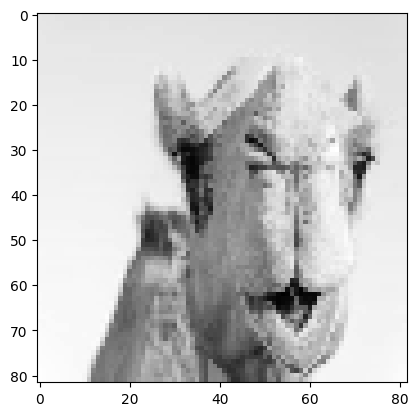

In [36]:
plt.imshow(image_poule, cmap='gray')

In [70]:
def convolution(image, matrice):
    (hauteur, largeur, dimension) = image.shape
    image_conv = np.zeros((hauteur, largeur))
    for x in range(1, largeur - 1):
        for y in range(1, hauteur - 1):
            image_conv[x,y] = np.sum(matrice * image[x-1:x+2, y-1:y+2])
    return image_conv

In [71]:
import matplotlib.image as mpimg

In [72]:
def bord(image):
    img = mpimg.imread(image)
    img_bord = convolution(img, np.array([[1,1,1], [1,-8,1], [1,1,1]]))
    plt.imshow(img_bord, cmap='gray')

In [73]:
chameau = '/Users/nostradamus/Documents/Chartes/Cours_ENC/Cours_Chartes/grismoyen-camel_1.jpeg'

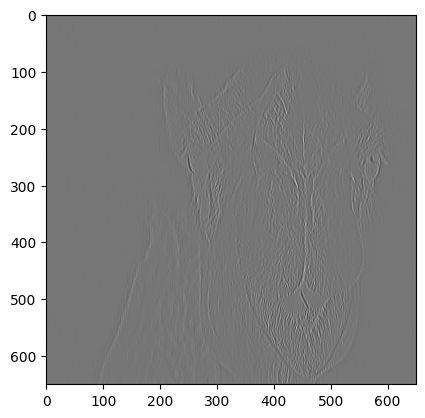

In [74]:
bord(chameau)

In [58]:
img = mpimg.imread(chameau)

In [64]:
img.shape

(650, 650, 3)

In [75]:
def flou(image):
    img = mpimg.imread(image)
    img_bord = convolution(img, np.array([[1,2,1], [2,4,2], [1,2,1]])) / 16
    plt.imshow(img_bord, cmap='gray')

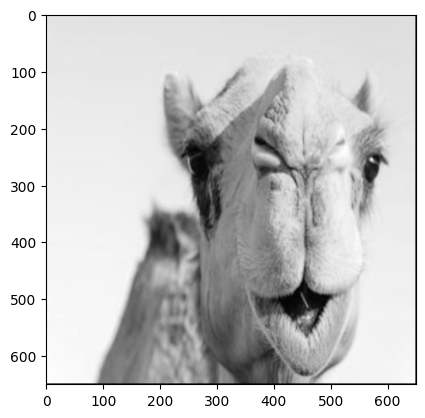

In [76]:
flou(chameau)

In [77]:
def sobel(image):
    img = mpimg.imread(image)
    img_bord = convolution(img, np.array([[-1,0,1], [-2,0,2], [-1,0,0]]))
    plt.imshow(img_bord, cmap='gray')

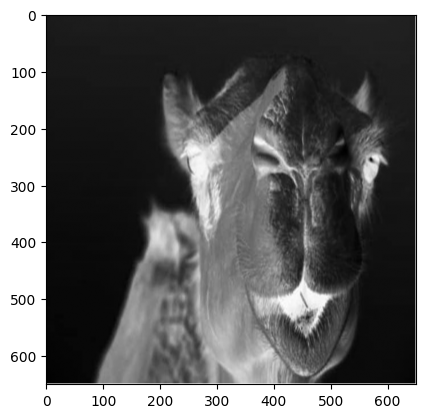

In [78]:
sobel(chameau)